<a href="https://colab.research.google.com/github/marcinwolter/NORCC-SUMMER_2022/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
'''Trains a simple convolutional NN on the MNIST dataset.

Gets over 99.6% test accuracy after 40 epochs
(there is *a lot* of margin for parameter tuning).

'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam

Define some parameters:

In [17]:
batch_size = 128  # size of the training batch
num_classes = 10  # number of classes. There are 10 different digits
epochs = 40  #20  # number of training epochs


In [18]:
# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

Load MNIST dataset

In [19]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Reshape

In [20]:
# Reshape 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

The value of each pixel is now between 0 and 255, we normalize it to the range (0,1)

In [21]:
#normalize to one

x_train = x_train/255.
x_test  = x_test/255.


<span style="color:#800000"> **Prepare data: </span>  <span style="color:#800000"> convert to categorical**





In [22]:
# store original y_test as y_test0
y_test0 = y_test

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test =  tf.keras.utils.to_categorical(y_test, num_classes)



<span style="color:#800000"> __Define Keras Model__ </span>


In [23]:
model = Sequential()

#nl = 64
#model.add(Dense(nl, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(nl, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(num_classes, activation='softmax'))


model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      


<span style="color:#800000"> __Train the network__ </span>





In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0005), #RMSprop(),
              metrics=['accuracy'])


In [25]:
# Actual training
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/40
469/469 [==============================] - 6s 11ms/step - loss: 0.3994 - accuracy: 0.8709 - val_loss: 0.0639 - val_accuracy: 0.9782
Epoch 2/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1125 - accuracy: 0.9665 - val_loss: 0.0387 - val_accuracy: 0.9878
Epoch 3/40
469/469 [==============================] - 5s 11ms/step - loss: 0.0752 - accuracy: 0.9776 - val_loss: 0.0305 - val_accuracy: 0.9901
Epoch 4/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0634 - accuracy: 0.9813 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 5/40
469/469 [==============================] - 5s 11ms/step - loss: 0.0533 - accuracy: 0.9846 - val_loss: 0.0229 - val_accuracy: 0.9924
Epoch 6/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0198 - val_accuracy: 0.9934
Epoch 7/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0421 - accuracy: 0.9876 - val_loss: 0.0195 - val_accuracy: 0.9930

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])


Test accuracy: 0.9955999851226807


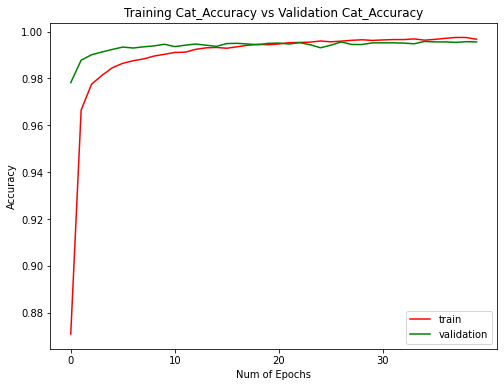

In [27]:
# Plots for training and testing process: loss and accuracy

n_epochs = len(history.history['loss'])

plt.figure(0)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Cat_Accuracy vs Validation Cat_Accuracy")
plt.legend(['train','validation'])



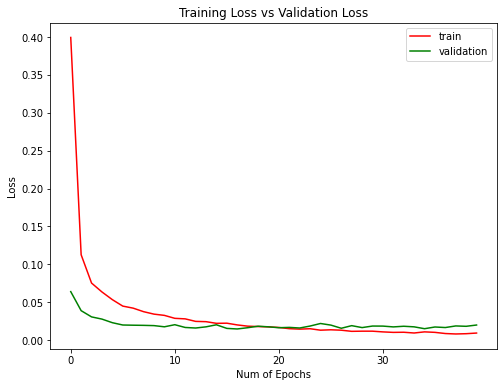

In [28]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, n_epochs, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()



In [29]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

y_test2 = np.argmax(y_test, axis=1)



#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)



313/313 - 1s - 598ms/epoch - 2ms/step
[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1133    0    0    0    0    0    2    0    0]
 [   0    1 1027    0    0    0    0    4    0    0]
 [   0    0    2 1007    0    0    0    0    1    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   0    0    0    5    0  885    1    1    0    0]
 [   4    2    0    0    1    1  948    0    2    0]
 [   0    2    0    0    0    0    0 1026    0    0]
 [   0    0    2    0    0    0    0    0  971    1]
 [   0    0    0    0    4    3    0    0    1 1001]]


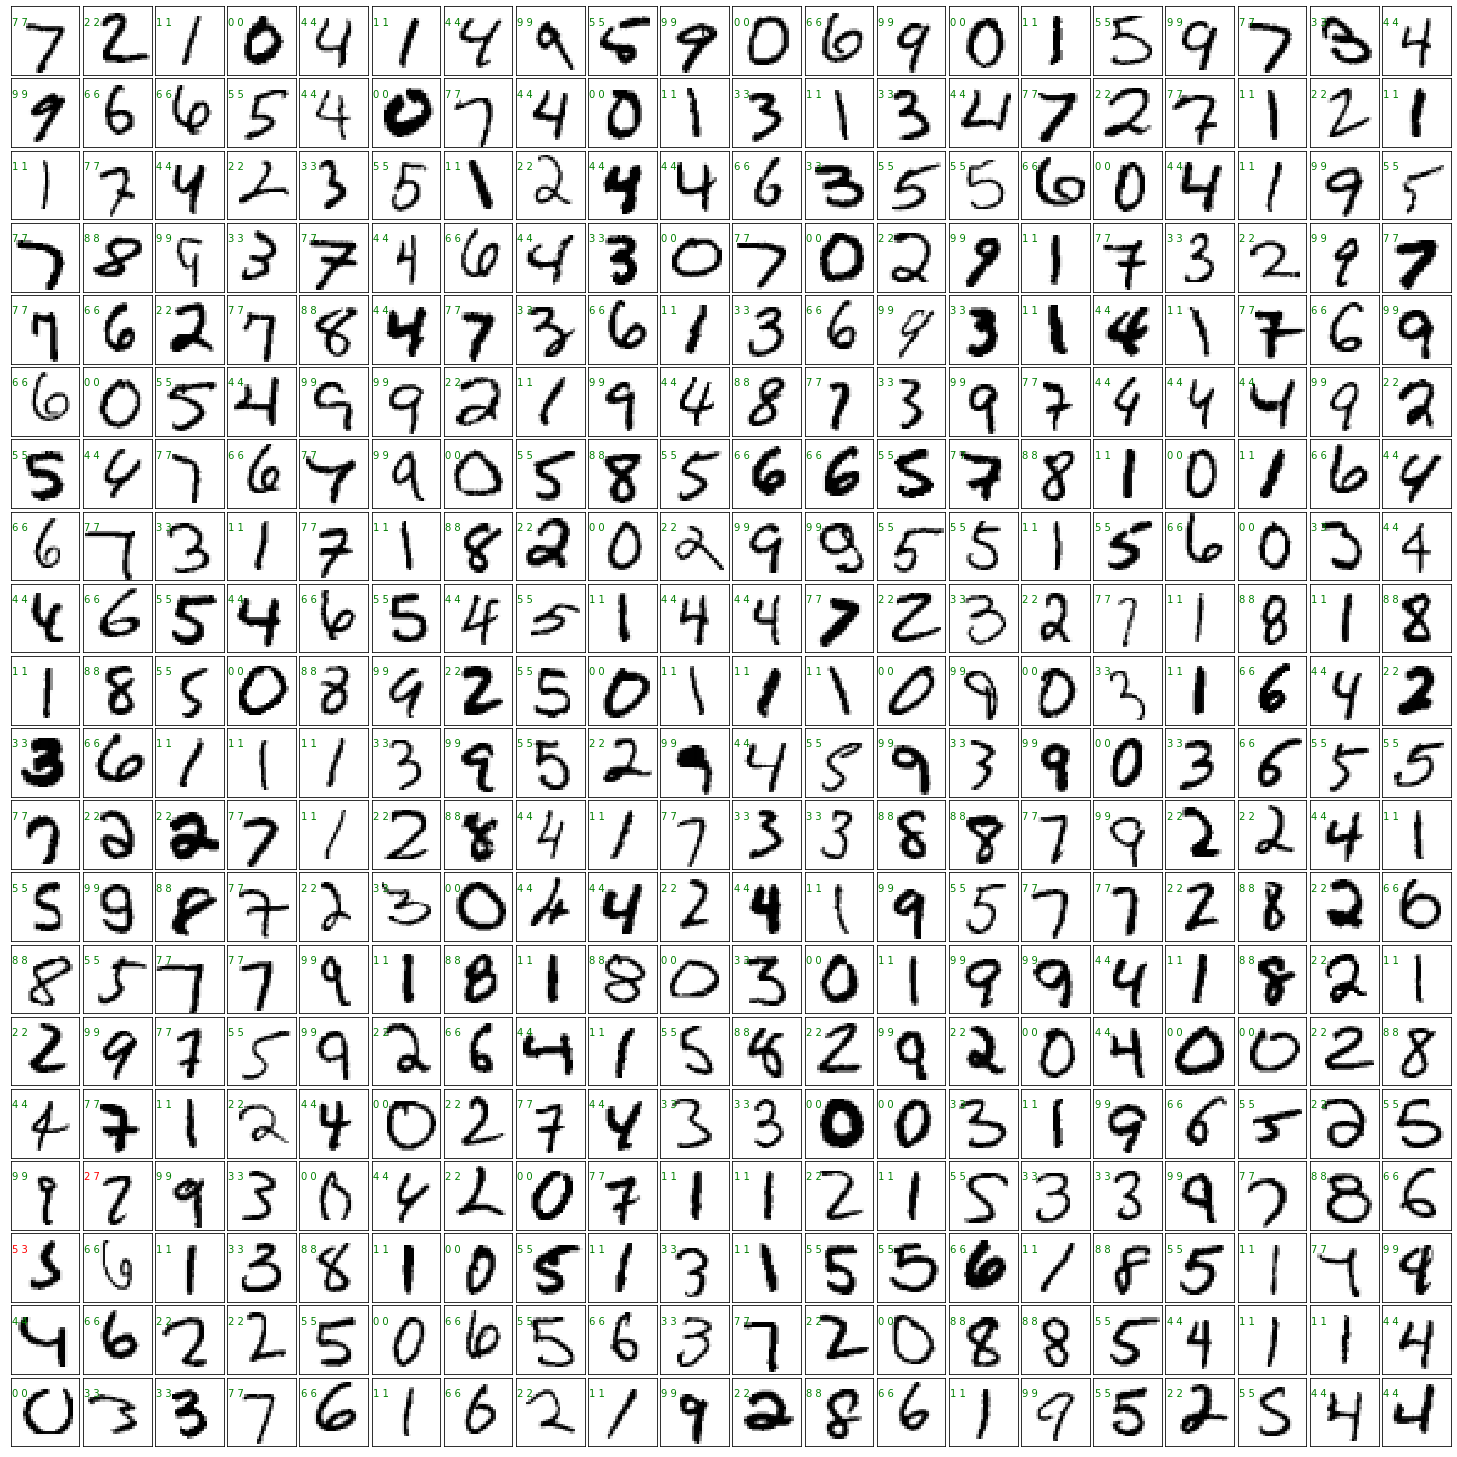

In [30]:
# use the model to predict the labels of the test data
predicted = model.predict(x_test)
expected = y_test0



# Plot the prediction
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if np.argmax(predicted[i]) == expected[i]:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='green')
    else:
        ax.text(0, 7, str(expected[i])+" "+str(np.argmax(predicted[i])), color='red')